In [4]:
import bisect
import random
from dataStructures import *
from fruitchain import *
import matplotlib.pyplot as plt
import math
import numpy as np

ImportError: No module named 'plotly'

In [2]:
hashFracsLog = [[0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.25, 0.25, 0.25, 0.25],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0],
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333, 0.0]]

filename = "sim_results/"

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


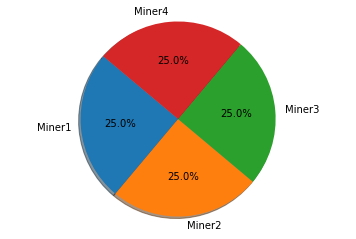

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


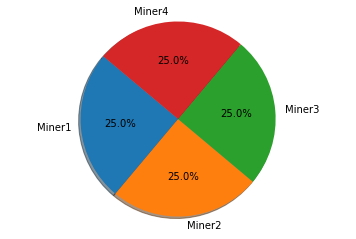

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


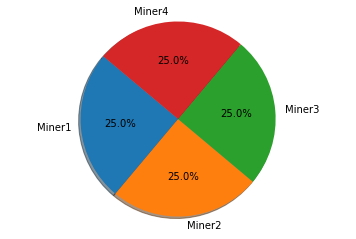

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


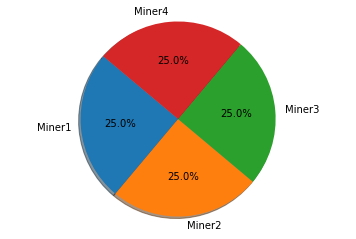

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


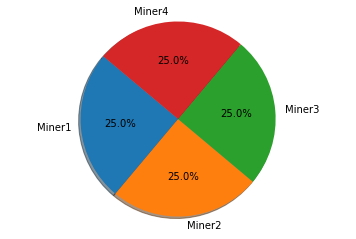

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


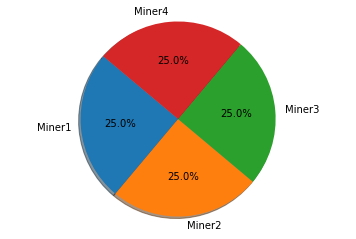

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


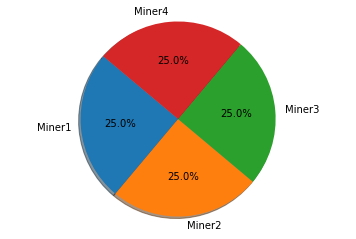

['Miner1', 'Miner2', 'Miner3', 'Miner4'] [0.25, 0.25, 0.25, 0.25]


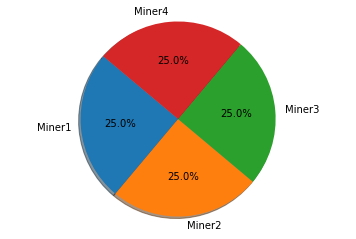

['Miner1', 'Miner2', 'Miner3'] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


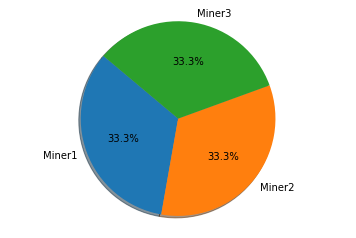

['Miner1', 'Miner2', 'Miner3'] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


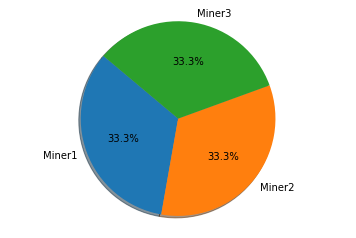

['Miner1', 'Miner2', 'Miner3'] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]


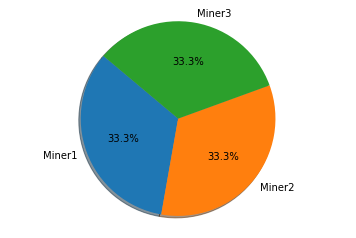

In [3]:
ctr = 0
for hashFracs in hashFracsLog:
    ctr2 = 1
    minerIDs, tmp = [], []
    for hashFrac in hashFracs:
        if hashFrac != 0:
            minerIDs.append(ctr2)
            tmp.append(hashFrac)
        ctr2 += 1
    labels = ['Miner' + str(_id) for _id in minerIDs]
    print(labels, tmp)
    plt.pie(tmp, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show(filename + 'hashFracs_' + str(ctr) + '.png')
    ctr += 1